In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk wordcloud contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv')

In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [ ]:
df["Rating"].unique()

array([4, 2, 3, 5, 1])

In [ ]:
df.columns

Index(['Review', 'Rating'], dtype='object')

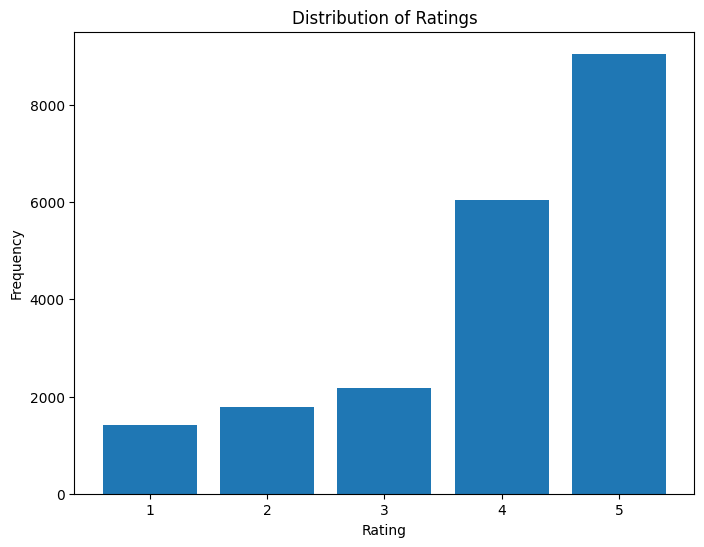

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'Rating' column
rating_counts = df['Rating'].value_counts().sort_index()

# creating a bar plot for visualization
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

In [ ]:
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


In [ ]:
# Drop the 'tokens' column if it exists before checking for duplicates
if 'tokens' in df.columns:
    df = df.drop(columns=['tokens'])

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [ ]:
# getting the shape of the dataset
total_rows, total_columns = df.shape

# printing the shape of the dataset
print("Total Rows:", total_rows)
print("Total Columns:", total_columns)

Total Rows: 20491
Total Columns: 2


In [ ]:
!pip install contractions

In [ ]:
import pandas as pd
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews.csv')  # Replace with your actual path
df.dropna(subset=['Review', 'Rating'], inplace=True)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# --- PART 1: Clean reviews for modeling ---
def clean_text(text):
    text = text.lower()  # Lowercase
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)  # Remove URLs, mentions, hashtags
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(tokens)

# Apply to DataFrame
df['cleaned_review'] = df['Review'].apply(clean_text)


def process_tokens(df):
    '''
    Processes reviews for token analysis and returns top 60 frequent words.
    '''
    # Expand contractions
    df['expanded_text'] = df['Review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)

    # Tokenize
    df['tokens'] = df['expanded_text'].apply(word_tokenize)

    # Lowercase
    df['tokens'] = df['tokens'].apply(lambda x: [token.lower() for token in x])

    # Remove punctuation/non-alphabetic characters
    def remove_symbols(tokens):
        return [token for token in tokens if re.match('^[a-zA-Z]+$', token)]
    df['tokens'] = df['tokens'].apply(remove_symbols)

    # Strip whitespace
    df['tokens'] = df['tokens'].apply(lambda x: [token.strip() for token in x if token.strip()])

    # Remove stopwords
    df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])

    # Lemmatize
    df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

    # Combine all tokens into one list
    all_tokens = [token for sublist in df['tokens'] for token in sublist]

    # Create frequency distribution
    word_freq = nltk.FreqDist(all_tokens)

    # Return top 100 most common words
    return word_freq.most_common(100)


In [ ]:
# Run and display most common words
common_words = process_tokens(df)
print("Most Common Words:\n", common_words)

Most Common Words:
 [('hotel', 52831), ('room', 46273), ('great', 21091), ('good', 17031), ('staff', 16260), ('stay', 15323), ('night', 13731), ('day', 12720), ('time', 12583), ('nice', 12403), ('location', 11204), ('service', 10496), ('stayed', 10465), ('restaurant', 10065), ('beach', 10016), ('breakfast', 9643), ('place', 9371), ('clean', 9368), ('food', 9221), ('resort', 8898), ('pool', 8185), ('like', 8184), ('really', 7764), ('bed', 7502), ('area', 7022), ('people', 6819), ('friendly', 6665), ('small', 6521), ('bar', 6357), ('little', 6241), ('walk', 6230), ('got', 6186), ('excellent', 5999), ('view', 5856), ('bathroom', 5825), ('best', 5672), ('minute', 5551), ('helpful', 5449), ('trip', 5399), ('floor', 5211), ('lot', 5083), ('water', 5010), ('recommend', 4849), ('price', 4716), ('make', 4715), ('review', 4704), ('beautiful', 4649), ('went', 4642), ('thing', 4627), ('desk', 4418), ('comfortable', 4406), ('want', 4380), ('problem', 4373), ('way', 4275), ('drink', 4258), ('right',

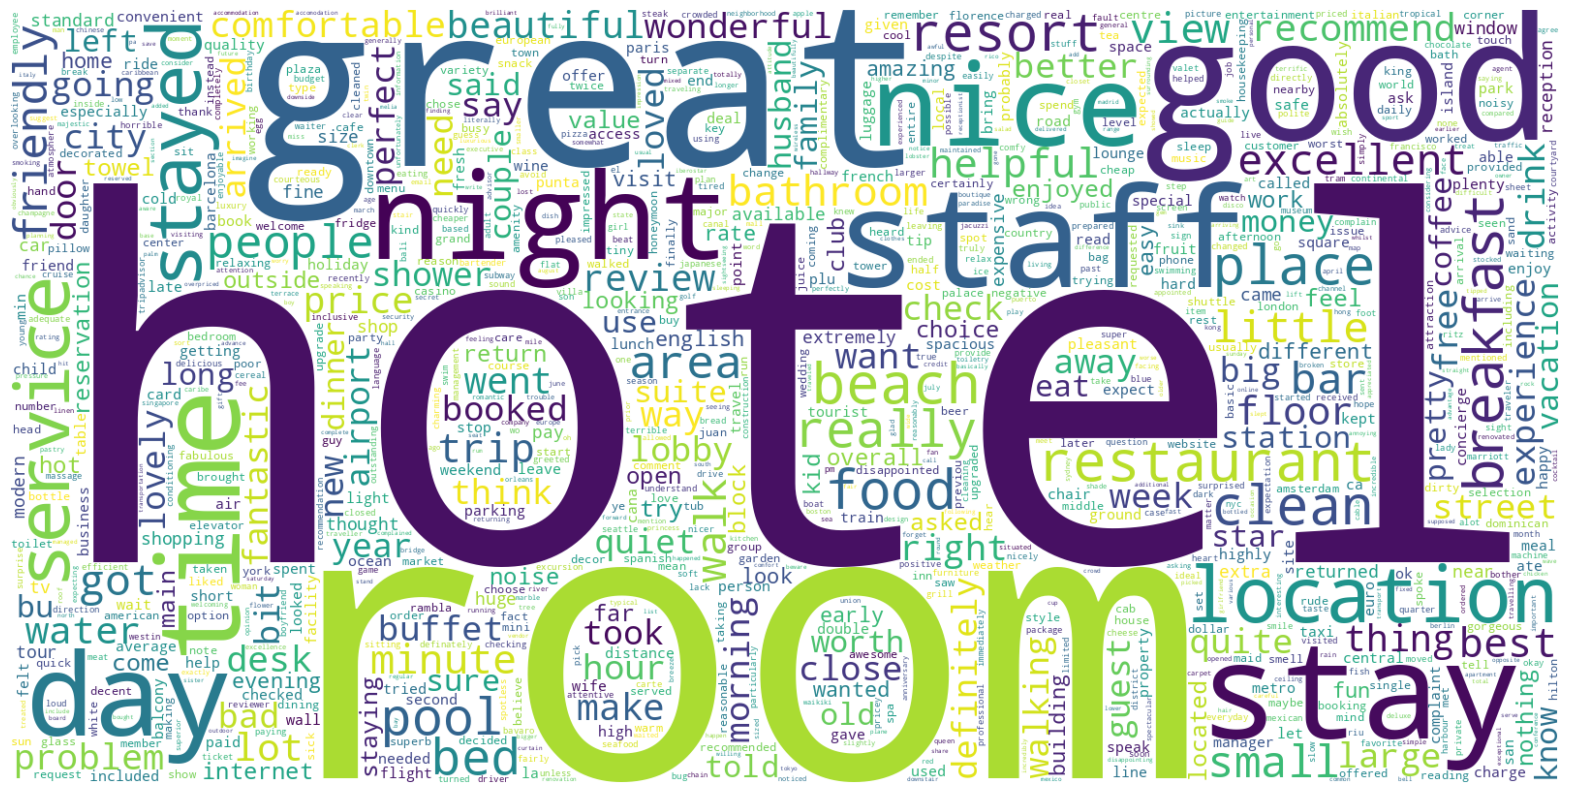

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'tokens' column into one list
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Join the list of tokens into a single string
all_tokens_string = " ".join(all_tokens)

wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False, background_color='white').generate(all_tokens_string)
               # Added background_color for consistency with the paraphrased example input

# Display the word cloud using the specified plotting parameters
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear') # Added interpolation for smoother display
plt.axis("off")
plt.show()

In [ ]:
def flatten_tokens_to_sentence(tokens):
    return " ".join(tokens)

df['cleaned_review'] = df['tokens'].apply(flatten_tokens_to_sentence)
df.head()

,Review,Rating,cleaned_review,expanded_text,tokens
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,nice rooms not 4* experience hotel monaco seat...,"[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"unique, great stay, wonderful time hotel monac...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
df = df[['Rating', 'cleaned_review']]
df.rename(columns={'cleaned': 'cleaned_review'}, inplace=True)

<ipython-input-18-4fe962de8869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cleaned': 'cleaned_review'}, inplace=True)


In [ ]:
df.head()

,Rating,cleaned_review
0,4,nice hotel expensive parking got good deal sta...
1,2,ok nothing special charge diamond member hilto...
2,3,nice room experience hotel monaco seattle good...
3,5,unique great stay wonderful time hotel monaco ...
4,5,great stay great stay went seahawk game awesom...


In [ ]:
!pip install tensorflow

In [ ]:
#80% train, 20% test
import numpy as np
from sklearn.model_selection import train_test_split

# Map ratings to 0-indexed (for deep learning)
y_data = df['Rating'] - 1
X_data = df['cleaned_review']

# Train-validation-test split (70-10-20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.67, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 14343 samples
Validation set: 2028 samples
Test set: 4120 samples


Vocabulary size: 35884
Max sequence length: 243


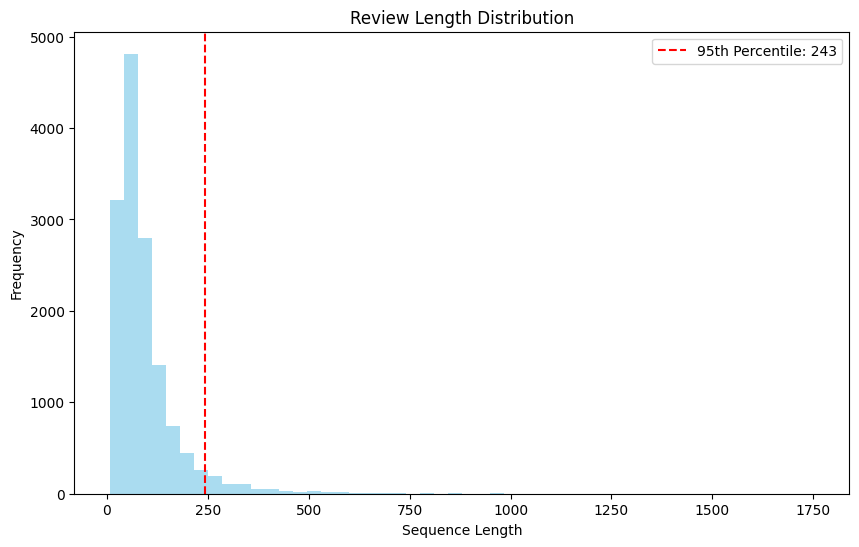

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenize text
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Determine sequence length (use 95th percentile)
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))
print(f"Max sequence length: {max_len}")

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Visualize sequence length distribution
plt.figure(figsize=(10, 6))
plt.hist(seq_lengths, bins=50, alpha=0.7, color='skyblue')
plt.axvline(max_len, color='red', linestyle='--', label=f'95th Percentile: {max_len}')
plt.title('Review Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# --------- MODEL 1: SIMPLE LSTM ---------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build model
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile model
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.0001
)

# Train model
history_lstm = model_lstm.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.4592 - loss: 1.2903 - val_accuracy: 0.5804 - val_loss: 0.9151 - learning_rate: 0.0010
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6498 - loss: 0.8060 - val_accuracy: 0.6050 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7410 - loss: 0.6425 - val_accuracy: 0.6114 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.8037 - loss: 0.5101 - val_accuracy: 0.5971 - val_loss: 1.0269 - learning_rate: 0.0010
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8668 - loss: 0.3848 - val_accuracy: 0.6060 - val_loss: 1.1367 - learning_rate: 2.0000e-04


In [ ]:
# --------- MODEL 2: SIMPLE RNN ---------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build model
model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Bidirectional(SimpleRNN(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(SimpleRNN(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile model
model_rnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.0001
)

# Train model
history_rnn = model_rnn.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 76s 595ms/step - accuracy: 0.4307 - loss: 1.3049 - val_accuracy: 0.5828 - val_loss: 0.9568 - learning_rate: 0.0010
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 79s 568ms/step - accuracy: 0.6398 - loss: 0.8434 - val_accuracy: 0.6105 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 563ms/step - accuracy: 0.7515 - loss: 0.6169 - val_accuracy: 0.5957 - val_loss: 1.0142 - learning_rate: 0.0010
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 594ms/step - accuracy: 0.8721 - loss: 0.3657 - val_accuracy: 0.5611 - val_loss: 1.3592 - learning_rate: 0.0010
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 78s 560ms/step - accuracy: 0.9506 - loss: 0.1705 - val_accuracy: 0.5646 - val_loss: 1.4919 - learning_rate: 2.0000e-04


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.13.1 gensim==4.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalle

In [ ]:
# --------- MODEL 2: WORD2VEC + LSTM ---------

# Load pre-trained Word2Vec embeddings
print("Loading Word2Vec embeddings...")
word_vectors = api.load("word2vec-google-news-300")
embedding_dim = 300

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
words_found = 0

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    try:
        if word in word_vectors:
            embedding_matrix[i] = word_vectors[word]
            words_found += 1
    except:
        continue

print(f"Found {words_found} words in Word2Vec embeddings")

# Build model with pre-trained embeddings
model_word2vec = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False
    ),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

# Compile model
model_word2vec.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

# Train model
history_word2vec = model_word2vec.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr]
)

Loading Word2Vec embeddings...
Found 23129 words in Word2Vec embeddings
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.3999 - loss: 1.3439 - val_accuracy: 0.5493 - val_loss: 1.0216 - learning_rate: 5.0000e-04
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.5606 - loss: 0.9943 - val_accuracy: 0.5769 - val_loss: 0.9700 - learning_rate: 5.0000e-04
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.6007 - loss: 0.9339 - val_accuracy: 0.5976 - val_loss: 0.9412 - learning_rate: 5.0000e-04
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 436s 3s/step - accuracy: 0.6204 - loss: 0.8806 - val_accuracy: 0.6040 - val_loss: 0.8923 - learning_rate: 5.0000e-04
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.6257 - loss: 0.8613 - val_accuracy: 0.6287 - val_loss: 0.8483 - learning_rate: 5.0000e-04
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - accuracy: 0.6417 - loss: 0.8295 - val_accuracy: 0.6292 - val_loss: 0.8480 - learning_rat

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --------- MODEL EVALUATION ---------

# Evaluate all models on test set
lstm_eval = model_lstm.evaluate(X_test_pad, y_test, verbose=1)
word2vec_eval = model_word2vec.evaluate(X_test_pad, y_test, verbose=1)
rnn_eval = model_rnn.evaluate(X_test_pad, y_test, verbose=1)

# Print accuracy in percentage format (multiplied by 100)
print(f"\nLSTM Test Loss: {lstm_eval[0]:.4f}, Test Accuracy: {lstm_eval[1]*100:.2f}%")
print(f"Word2Vec+LSTM Test Loss: {word2vec_eval[0]:.4f}, Test Accuracy: {word2vec_eval[1]*100:.2f}%")
print(f"Simple RNN Test Loss: {rnn_eval[0]:.4f}, Test Accuracy: {rnn_eval[1]*100:.2f}%")
print(f"\nLSTM Test Loss: {lstm_eval[0]:.4f}, Test Accuracy: {lstm_eval[1]:.4f}")
print(f"Word2Vec+LSTM Test Loss: {word2vec_eval[0]:.4f}, Test Accuracy: {word2vec_eval[1]:.4f}")
print(f"Simple RNN Test Loss: {rnn_eval[0]:.4f}, Test Accuracy: {rnn_eval[1]:.4f}")

# Get predictions
y_pred_lstm = np.argmax(model_lstm.predict(X_test_pad), axis=1)
y_pred_word2vec = np.argmax(model_word2vec.predict(X_test_pad), axis=1)
y_pred_rnn = np.argmax(model_rnn.predict(X_test_pad), axis=1)

# Create confusion matrices
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
cm_word2vec = confusion_matrix(y_test, y_pred_word2vec)
cm_rnn = confusion_matrix(y_test, y_pred_rnn)

# Get classification reports
target_labels = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']

report_lstm = classification_report(y_test, y_pred_lstm, target_names=target_labels)
report_word2vec = classification_report(y_test, y_pred_word2vec, target_names=target_labels)
report_rnn = classification_report(y_test, y_pred_rnn, target_names=target_labels)

# Print reports
print("\nLSTM Classification Report:")
print(report_lstm)

print("\nWord2Vec+LSTM Classification Report:")
print(report_word2vec)

print("\nSimple RNN Classification Report:")
print(report_rnn)


129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.6103 - loss: 0.8677
129/129 ━━━━━━━━━━━━━━━━━━━━ 62s 478ms/step - accuracy: 0.6633 - loss: 0.8118
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.6067 - loss: 0.8972

LSTM Test Loss: 0.8834, Test Accuracy: 59.66%
Word2Vec+LSTM Test Loss: 0.8267, Test Accuracy: 64.68%
Simple RNN Test Loss: 0.9136, Test Accuracy: 59.71%

LSTM Test Loss: 0.8834, Test Accuracy: 0.5966
Word2Vec+LSTM Test Loss: 0.8267, Test Accuracy: 0.6468
Simple RNN Test Loss: 0.9136, Test Accuracy: 0.5971
129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 462ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

      1 Star       0.63      0.67      0.65       285
     2 Stars       0.39      0.47      0.43       361
     3 Stars       0.33      0.31      0.32       439
     4 Stars       0.52      0.44      0.48      1214
     5 Stars       0.74      0

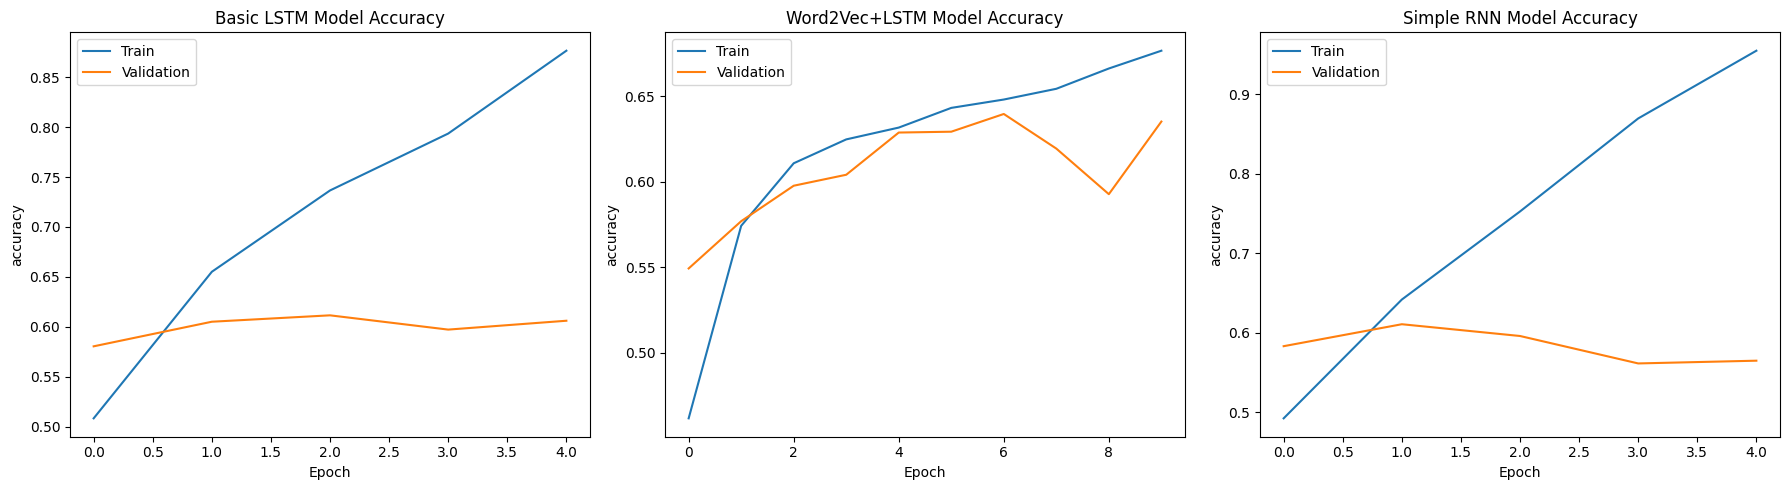

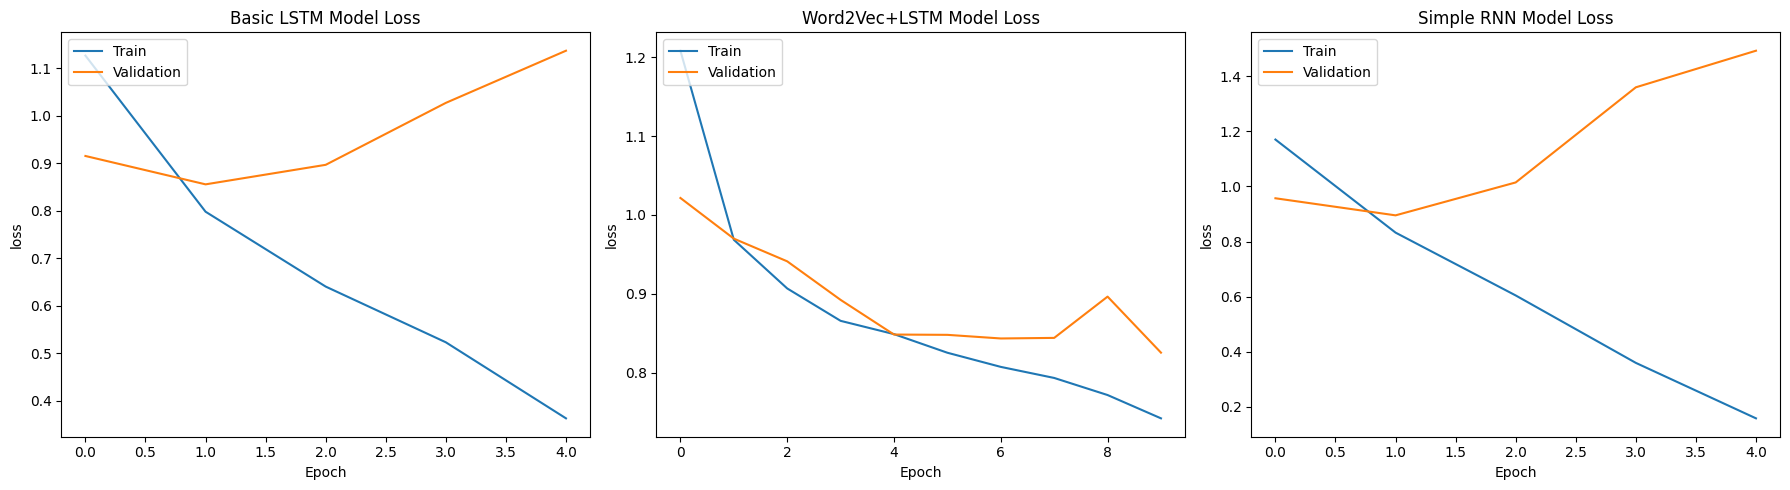

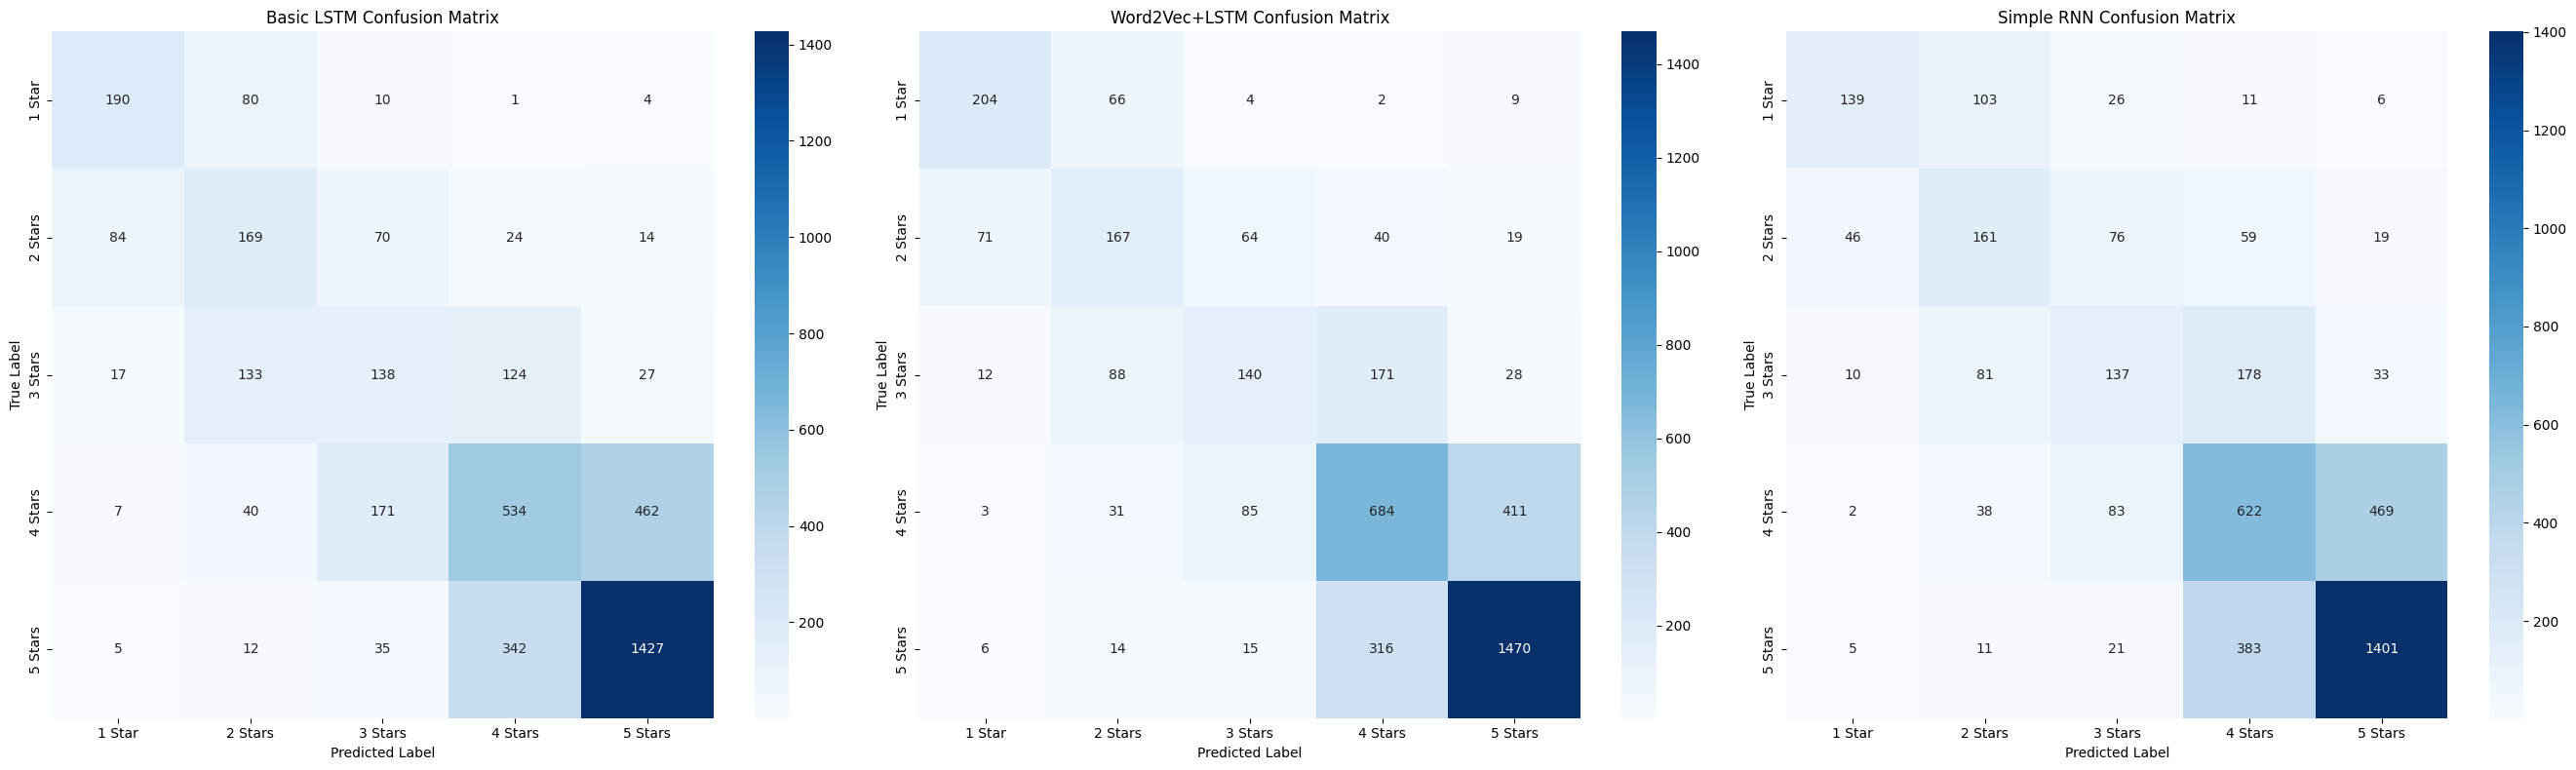

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --------- VISUALIZATIONS ---------

# Plot training history
def plot_history(history1, history2, history3, labels, metric="accuracy"):
    plt.figure(figsize=(18, 5))

    for i, history in enumerate([history1, history2, history3]):
        plt.subplot(1, 3, i+1)
        plt.plot(history.history[metric])
        plt.plot(history.history[f'val_{metric}'])
        plt.title(f'{labels[i]} Model {metric.capitalize()}')
        plt.ylabel(metric)
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot accuracy history
plot_history(history_lstm, history_word2vec, history_rnn, ["Basic LSTM", "Word2Vec+LSTM", "Simple RNN"], "accuracy")

# Plot loss history
plot_history(history_lstm, history_word2vec, history_rnn, ["Basic LSTM", "Word2Vec+LSTM", "Simple RNN"], "loss")

# Visualize confusion matrices
plt.figure(figsize=(27, 8))

# LSTM
plt.subplot(1, 3, 1)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'],
            yticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.title('Basic LSTM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Word2Vec+LSTM
plt.subplot(1, 3, 2)
sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues',
            xticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'],
            yticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.title('Word2Vec+LSTM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Simple RNN
plt.subplot(1, 3, 3)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'],
            yticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
plt.title('Simple RNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()



In [ ]:
# --------- SAMPLE PREDICTION FUNCTION ---------

def predict_review(review_text, model=model_word2vec):
    """Function to predict rating for a single review"""
    # Clean the text
    cleaned = clean_text(review_text)

    # Tokenize and pad
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Predict
    pred = model.predict(padded)[0]
    rating = np.argmax(pred) + 1  # Convert back to 1-5 scale
    confidence = pred[np.argmax(pred)]

    print(f"Review: {review_text[:100]}...")
    print(f"Predicted Rating: {rating} stars (Confidence: {confidence:.4f})")

    # Show all confidence scores
    for i, score in enumerate(pred):
        print(f"  Score for {i+1} stars: {score:.4f}")

# Test with some sample reviews
sample_reviews = [
    "The hotel was amazing! Fantastic service and beautiful rooms. I would definitely stay here again.",
    "Average hotel, nothing special. The room was clean but small. Breakfast was okay.",
    "Terrible experience. The room was dirty, staff was rude, and the noise from the street kept me up all night."
]

for review in sample_reviews:
    predict_review(review)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Review: The hotel was amazing! Fantastic service and beautiful rooms. I would definitely stay here again....
Predicted Rating: 5 stars (Confidence: 0.9645)
  Score for 1 stars: 0.0000
  Score for 2 stars: 0.0001
  Score for 3 stars: 0.0003
  Score for 4 stars: 0.0351
  Score for 5 stars: 0.9645

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Review: Average hotel, nothing special. The room was clean but small. Breakfast was okay....
Predicted Rating: 3 stars (Confidence: 0.5499)
  Score for 1 stars: 0.0273
  Score for 2 stars: 0.3497
  Score for 3 stars: 0.5499
  Score for 4 stars: 0.0682
  Score for 5 stars: 0.0049

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Review: Terrible experience. The room was dirty, staff was rude, and the noise from the street kept me up al...
Predicted Rating: 1 stars (Confidence: 0.9342)
  Score for 1 stars: 0.9342
  Score for 2 stars: 0.0612
  Score for 3 stars: 0.0036
  Score for 4 stars: 0.0005
  Score for 5 stars: 0.0005



In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
 # --------- INTERACTIVE DEMO WITH GRADIO ---------

import gradio as gr

def gradio_predict(review_text):
    """Prediction function for Gradio interface"""
    # Clean the text
    cleaned = clean_text(review_text)

    # Tokenize and pad
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Get predictions from both models
    pred_lstm = model_lstm.predict(padded)[0]
    pred_word2vec = model_word2vec.predict(padded)[0]

    # Get ratings
    rating_lstm = np.argmax(pred_lstm) + 1
    rating_word2vec = np.argmax(pred_word2vec) + 1

    # Create star ratings
    stars_lstm = "⭐" * rating_lstm
    stars_word2vec = "⭐" * rating_word2vec

    # Create confidence scores
    conf_lstm = pred_lstm[np.argmax(pred_lstm)]
    conf_word2vec = pred_word2vec[np.argmax(pred_word2vec)]

    # Format output
    output = f"Basic LSTM Model: {stars_lstm} ({rating_lstm}/5) - Confidence: {conf_lstm:.2f}\n\n"
    output += f"Word2Vec+LSTM Model: {stars_word2vec} ({rating_word2vec}/5) - Confidence: {conf_word2vec:.2f}"

    return output

# Create Gradio interface
demo = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Textbox(lines=5, placeholder="Enter a hotel review here..."),
    outputs="text",
    title="Hotel Review Rating Predictor",
    description="Type or paste a hotel review to predict its star rating",
    examples=[
        ["This hotel exceeded all my expectations. The staff was incredibly friendly and the room was spotless. The breakfast buffet had so many options and everything was delicious."],
        ["The hotel was decent. Room was clean but small. Location was good, close to many attractions."],
        ["Disappointing stay. The room was tiny and outdated. Bathroom had mold and the shower was barely working. Would not recommend."]
    ]
)

# Launch the demo
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://df19c784d0e3e29da0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
